In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [81]:
"""
30 minutes of code planning good. 
scale of input does not matter? 
No it matters because that's what beta changes (the scale of things) 
but beta already changes it so we can keep mean to 0, 1 and tune beta properly
"""
def gen_y(n, d, distribution):
    if distribution == 'uniform':
        return np.random.uniform(0, 1, (n, d))
    elif distribution == 'normal':
        # scale of distributions
        return np.random.normal(0, 1, (n, d))
    else: 
        print("Distribution not supported")
        return -1 
    
def softmax_beta_x(x, beta = 1):
    return (np.exp(beta * x).T / np.sum(np.exp(beta * x), axis = 1)).T

def test_softmax_beta_x(x): 
    np.testing.assert_almost_equal(np.sum(x, axis = 1), 1)

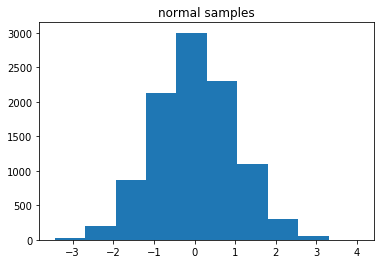

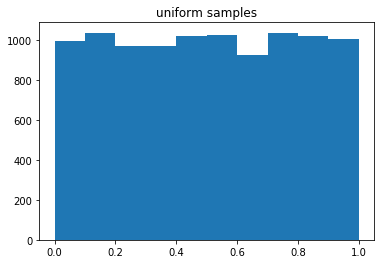

In [82]:
z = gen_y(10000, 1, "normal")
plt.hist(np.array(z).reshape(-1))
plt.title("normal samples")
plt.show()
z = gen_y(10000, 1, "uniform")
plt.hist(np.array(z).reshape(-1))
plt.title("uniform samples")
plt.show()

In [556]:
# scale of weights does not matter!!! (does not change ordering of results)
def gen_linear_f(d, distribution):
    if distribution == 'uniform':
        return np.random.uniform(0, 1, (d))
    elif distribution == 'normal':
        return np.random.normal(0, 1, (d))
    else: 
        print("Distribution not supported")
        return -1 
    
def gen_quadratic_f(d, distribution): 
    if distribution == "uniform": 
        return [np.random.uniform(0, 1, (d, d)), np.random.uniform(0, 1, (d))]
    elif distribution == "normal": 
        return [np.random.normal(0, 1, (d, d)), np.random.normal(0, 1, (d))]
    else: 
        print("Distribution not supported")
        return -1 

def linear_f(x, w):
    # bias doesn't matter because every value gets added bias. 
    return x.dot(w)
    
def quadratic_f(x, w): 
    # to do: find faster way to do computation
    Q, w_ = w[0], w[1]
    return np.array([a.T @ Q @ a + a.dot(w_) for a in x])

In [431]:
def compare_elements_through_sorted_linear_sweep(minimum_vertex_points, maximum_vertex_points):
    """ 
    lists minimum_vertex_points, maximum_vertex_points must be sorted in ascending order
    returns the total number of comparisons, 
    the counts where for all i, j minimum_vertex_points[i] >= maximum_vertex_points[j], 
    the counts where for all i, j minimum_vertex_points[i] < maximum_vertex_points[j],
    """
    minimum_vertex_points.sort()
    maximum_vertex_points.sort()
    i, j, n, m, greater_than = 0, 0, len(minimum_vertex_points), len(maximum_vertex_points), 0
    while i < n and j < m: 
        if minimum_vertex_points[i] < maximum_vertex_points[j]: 
            i += 1
        else: 
            greater_than += i;
            j += 1
    while j < m: 
        greater_than += n 
        j += 1
        
    total = n * m
    less_than_equal = total - greater_than
    return total, greater_than, less_than_equal


In [286]:
minimum_vertex_points = [0, 1, 2, 3, 5, 8] 
maximum_vertex_points = [2, 4, 6, 9, 10]
np.testing.assert_equal(compare_elements_through_sorted_linear_sweep(minimum_vertex_points, maximum_vertex_points), (30, 23, 7))
minimum_vertex_points = [0, 1, 2, 3, 5, 8] 
maximum_vertex_points = [2, 4, 6]
np.testing.assert_equal(compare_elements_through_sorted_linear_sweep(minimum_vertex_points, maximum_vertex_points), (18, 11, 7))


## Experiments

In [ ]:
# change code so that you can run multiple inputs, multiple weights initializations, multiple functions, and most importantly multiple B's 
# sanity check 1, decreasing Beta, etc. 
# run code 100 - times, report the mean, and std. (increase N if std deviation is too small, decrease N if too slow)
# plot the mean and std (make sure you are somewhat converging, need to do mcmc to really ensure)
# one plot right now 15 minutes, dimension = 10. 
# plot for beta varying with n-dimensisons. x-axis beta, y-axis dimensions. different plots of dimensions. 
# 35 minutes first task, 1 distraction 10 min. 

# plot for gaussian weights, gaussian inputs. 4 combinations. 
# plot for quadratic results 4 combinations
## To Do: plot for one layer NN 4 combinations
## To Do: plot for one layer NN 4 combinations 

## email David results 

In [560]:
def beta_softmax_function_simulations(num_of_points=1000, dims=10, beta=1, input_init="uniform", weight_init_args="uniform", function="linear"): 
    y = gen_y(n=num_of_points, d=dims, distribution=input_init)
    x = softmax_beta_x(x=y, beta=beta)
    test_softmax_beta_x(x=x)
    if function == "linear": 
        w = gen_linear_f(d=dims, distribution=weight_init_args)
        function = linear_f
    elif function == "quadratic": 
        w = gen_quadratic_f(d=dims, distribution=weight_init_args)
        function = quadratic_f
    else: 
        print("Invalid function choice")
        return
    output = function(x, w)
    discrete_argmax_index = np.argmax(function(np.eye(dims), w))
    nearest_discrete_vertex = np.argmax(x, axis = 1) 
    other_vertex_points = []
    maximum_vertex_points = []
    for i, val in enumerate(nearest_discrete_vertex): 
        if val == discrete_argmax_index: 
            maximum_vertex_points.append(output[i])
        else: 
            other_vertex_points.append(output[i])
    total, greater_than, less_than_equal = compare_elements_through_sorted_linear_sweep(other_vertex_points, maximum_vertex_points)
    return greater_than / total
    

In [452]:
beta_softmax_function_simulations(num_of_points=1000, dims=10, beta = 0.01)

0.7000558035714286

In [455]:
def average_beta_softmax_function_simulations(trials=100, num_of_points=1000, dims=10, beta=1, input_init="uniform", weight_init_args="uniform", function="linear"): 
    results = []
    for _ in range(trials): 
        results.append(beta_softmax_function_simulations(num_of_points, dims, beta, input_init, weight_init_args, function))
    return results, np.mean(results), np.std(results)

In [487]:
res, mean, std = average_beta_softmax_function_simulations(trials=100, num_of_points=10000, dims=100, beta=100, input_init="uniform", weight_init_args="uniform", function="linear")

In [513]:
def plot_average_beta_softmax_function_simulations(trials=100, num_of_points=10000, dims_lst=[2, 3, 5, 10, 25, 50, 100], beta_lst=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100], input_init="uniform", weight_init_args="uniform", function="linear"): 
    plt.figure(figsize=(12, 12))
    plt.title("Mean Percentage Diff", fontsize=20)
    plt.xlabel("Beta", fontsize=18)
    plt.ylabel("Mean percentage of continuous argmax samples greater than other samples", fontsize=18)
    plt.xscale("log")
    stds_lst = []
    for dim in dims_lst: 
        mean_lst, std_lst = [], []
        for beta in beta_lst: 
            res, mean, std = average_beta_softmax_function_simulations(trials, num_of_points, dim, beta, input_init, weight_init_args, function)
            mean_lst.append(mean)
            std_lst.append(std)
        stds_lst.append(std_lst)
        plt.plot(beta_lst, mean_lst, 'o-', label="Dim={}".format(dim))
    plt.legend(fontsize=15)
    plt.savefig("../plots/10_30_beta_softmax_errors_input_{}_weight_{}_function_{}.png".format(input_init, weight_init_args, function))
    plt.show()
    plt.close()
    plt.figure(figsize=(12, 12))
    plt.title("Std Percentage Diff", fontsize=20)
    plt.xscale("log")
    plt.xlabel("Beta", fontsize=18)
    plt.ylabel("Std of continuous argmax samples greater than other samples", fontsize=18)
    for i, dim in enumerate(dims_lst): 
        plt.plot(beta_lst, stds_lst[i], 'o-', label="Dim={}".format(dim))
    plt.legend(fontsize=15)
    plt.savefig("../plots/10_30_beta_softmax_std_input_{}_weight_{}_function_{}.png".format(input_init, weight_init_args, function))
    plt.show()
    plt.close()
    
        

/Users/chuck/Library/Python/3.6/lib/python/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


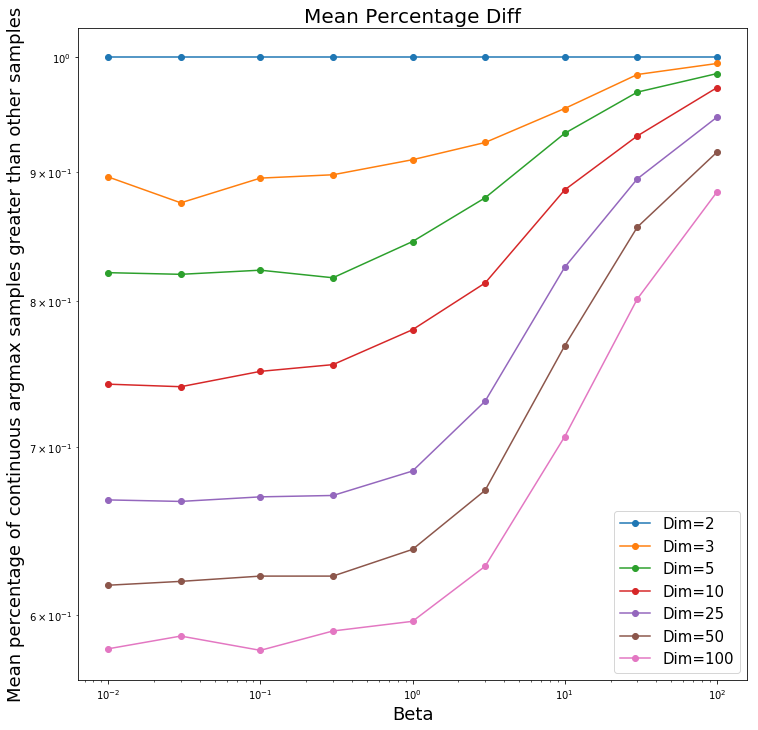

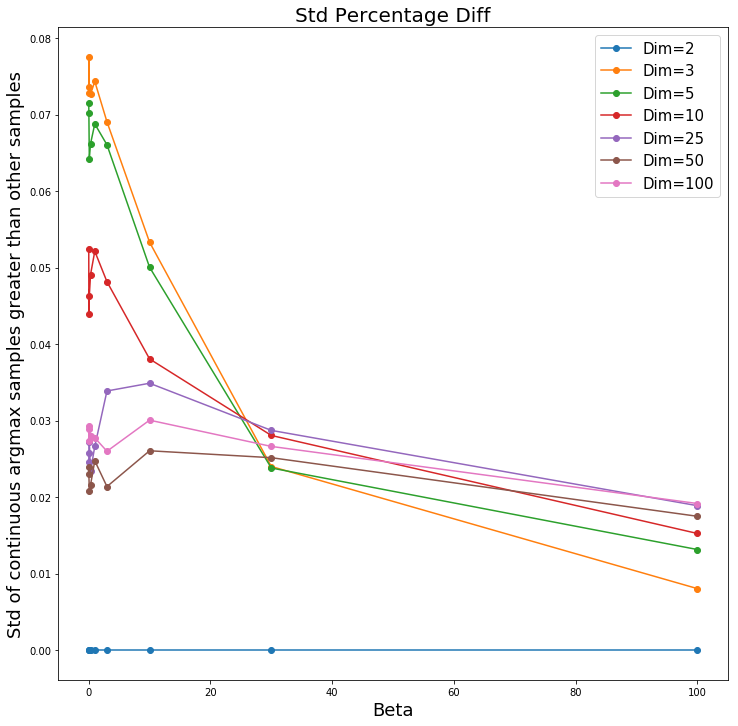

In [515]:
plot_average_beta_softmax_function_simulations()

/Users/chuck/Library/Python/3.6/lib/python/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


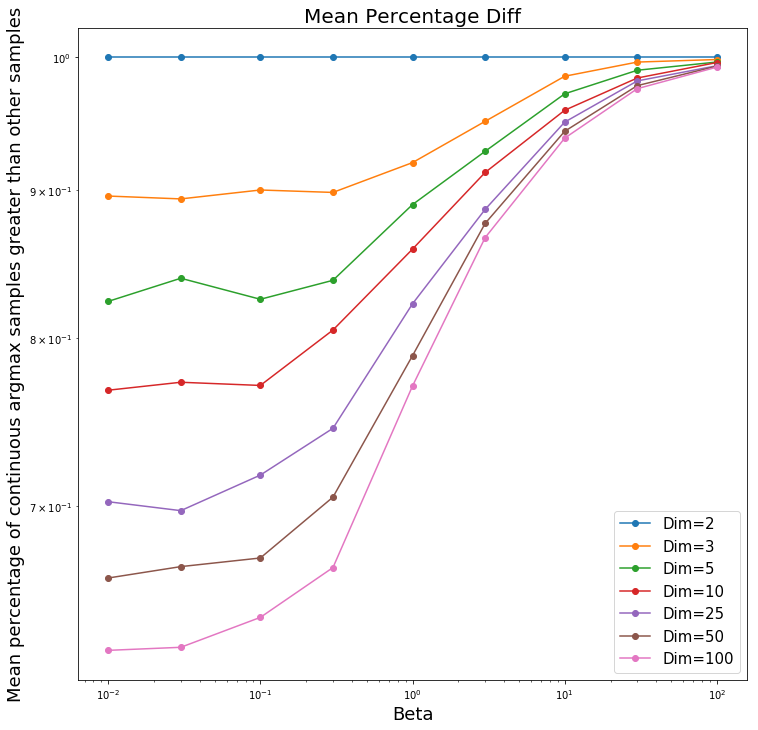

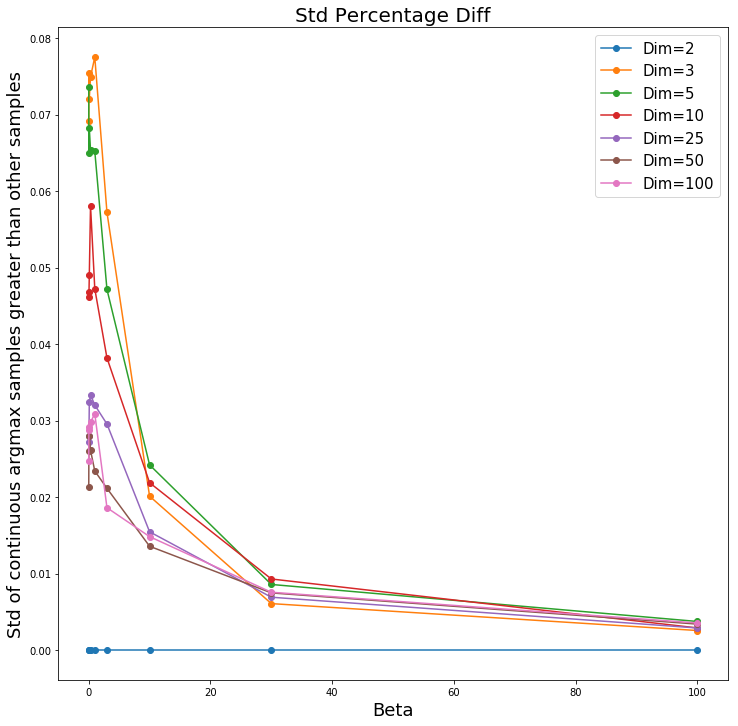

In [517]:
plot_average_beta_softmax_function_simulations(input_init="normal")

/Users/chuck/Library/Python/3.6/lib/python/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


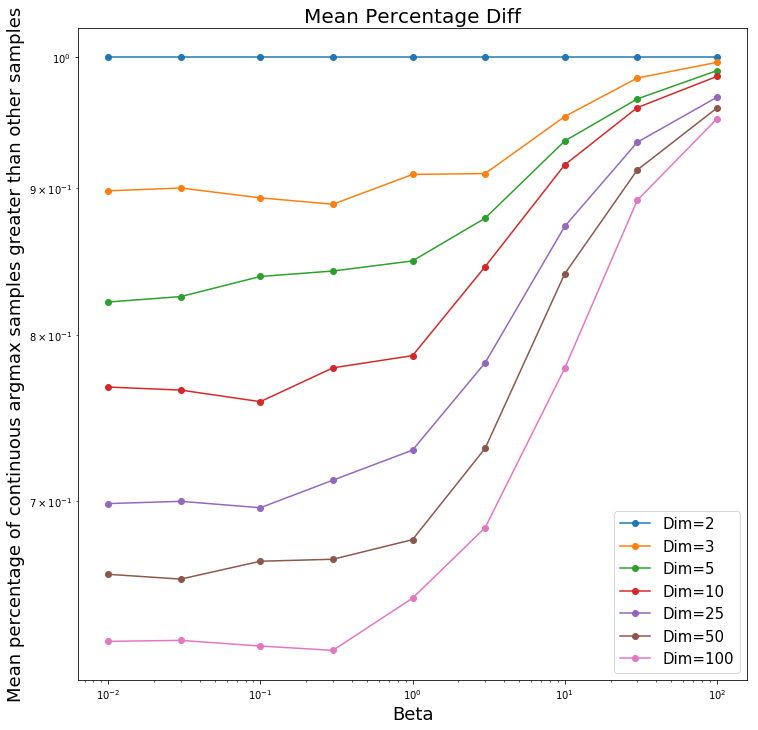

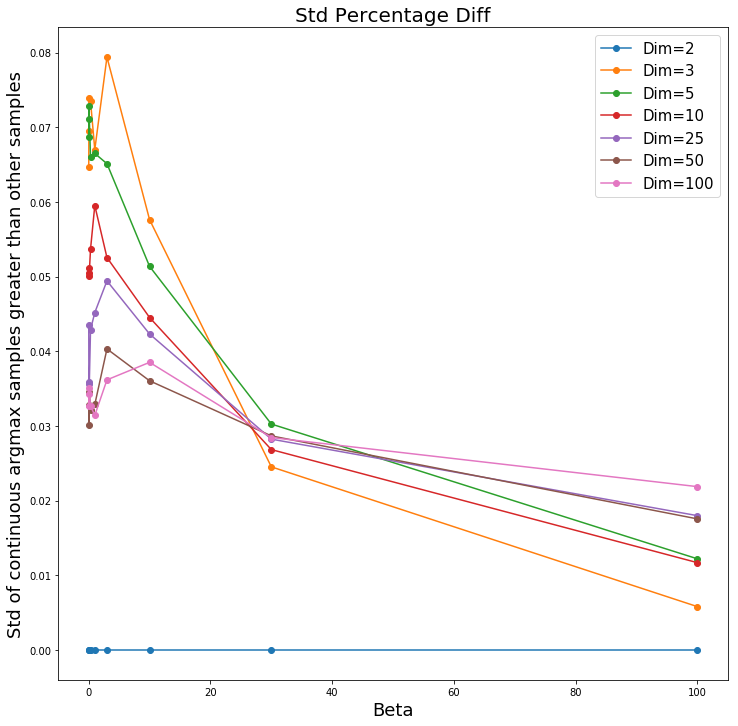

In [518]:
plot_average_beta_softmax_function_simulations(weight_init_args="normal")

/Users/chuck/Library/Python/3.6/lib/python/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


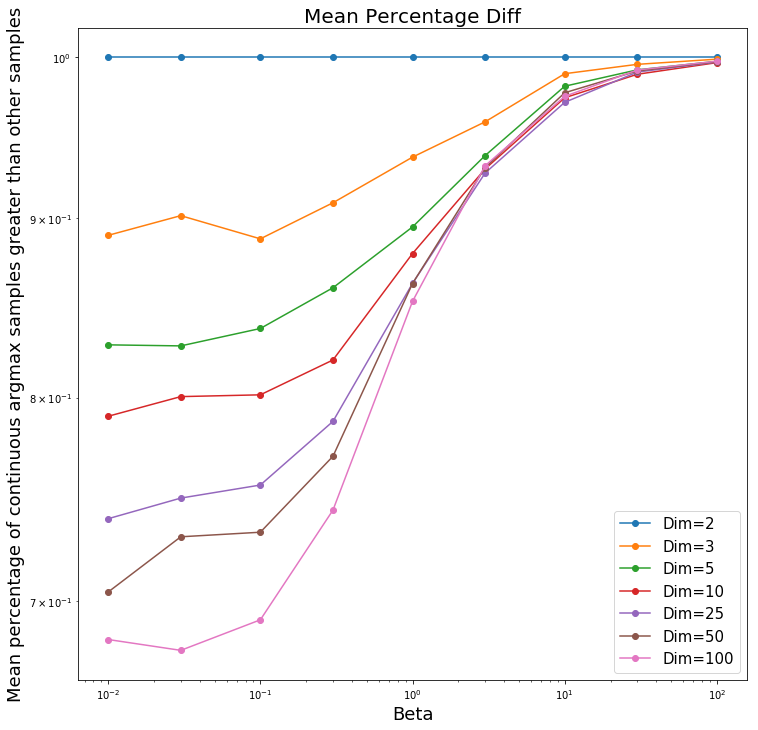

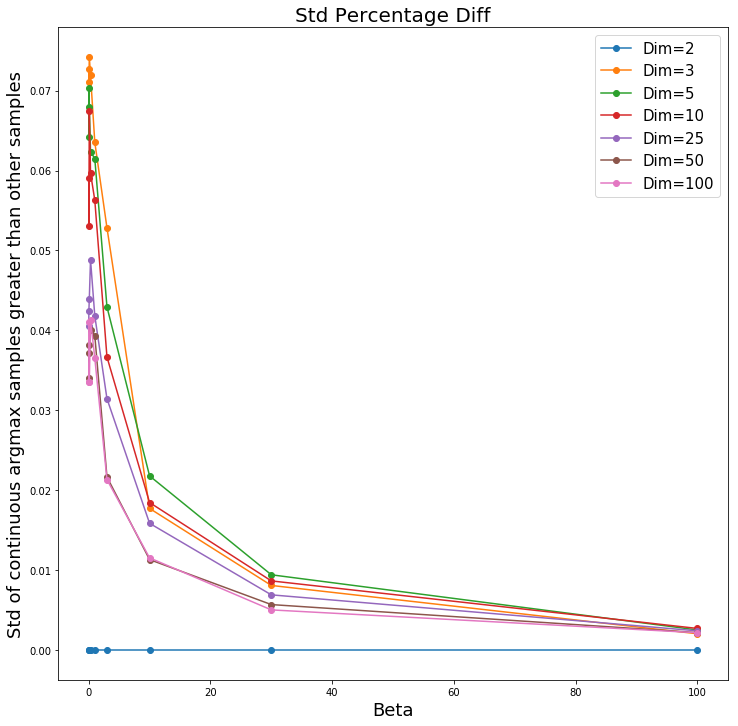

In [519]:
plot_average_beta_softmax_function_simulations(input_init="normal", weight_init_args="normal")

In [ ]:
plot_average_beta_softmax_function_simulations(function="quadratic")

In [ ]:
plot_average_beta_softmax_function_simulations(input_init="normal", weight_init_args="normal", function="quadratic")